## Введение в анализ данных, ИАД-1

## НИУ ВШЭ, 2018-19 учебный год

### Домашнее задание №1

Задание выполнил(а): _Шорыгина Татьяна_

### Общая информация

__Дата выдачи:__ 03.02.2019

__Дедлайн:__ 23:59 12.02.2019

### О задании

В данном домашнем задании вы попрактикуетесь в работе с библиотеками numpy, pandas и matplotlib.

### Оценивание и штрафы

Каждая задача $p_i$ оценивается в 1 балл; Оценка за ДЗ = $\frac{10}{24}\sum_{i}p_i $

За сдачу задания позже срока на итоговую оценку за задание накладывается штраф в размере 1 балл в день, но получить отрицательную оценку нельзя.

__Внимание!__ Домашнее задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов.

### Формат сдачи

Загрузка файлов с решениями происходит в системе [Anytask](https://anytask.org/).

Формат названия файла: homework_01_Фамилия_Имя.ipynb

## Часть 1. Numpy

In [2]:
import numpy as np

Во всех задачах необходимо написать код решения внутри функции и проверить его работу, вызвав функцию для данных из условия.

При решении задач запрещается использовать циклы (`for`, `while`) и оператор `if`.

Везде, где встречаются массивы или матрицы, подразумевается, что это `numpy.array`. 

### 1

Напишите функцию, возвращающую округленную взвешенную сумму оценок по данным оценкам и весам. Можете посчитать свою оценку за курс :) В нашем случае вес экзамена равен 0.3, вес домашек - 0.42, вес контрольной - 0.14, вес самостоятельных - 0.14. Например, если за экзамен у вас 7, за домашки 10, за контрольную 8, а за самостоятельные 6, то вы получите отличную оценку 8!

In [3]:
def result_mark(weights, marks):
    return np.round(np.sum(weights * marks)).astype(int)

In [4]:
weights = np.array([0.3, 0.42, 0.14, 0.14])
marks = np.array([7, 10, 8, 6])
result_mark(weights, marks)

8

### 2

Напишите функцию, меняющую все каждое третье (начиная с 0) значение массива целых чисел на заданное число. Например, если на вход поступает массив `array([3, 5, 1, 0, -3, 22, 213436])` и число `-111`, то на выходе должен получиться массив `array([-111, 5, 1, -111, -3, 22, -111])`.

In [5]:
def change_array(array, number):
    array[::3] = number
    return array

In [6]:
array = np.array([3, 5, 1, 0, -3, 22, 213436])
number = -111
change_array(array, number)

array([-111,    5,    1, -111,   -3,   22, -111])

### 3

Напишите функцию, выдающую индексы «близких» элементов заданных массивов, а именно тех пар элементов, чей модуль разницы не превосходит заданного значения. Например, если на вход поступают массив `array([1.5, 0.5, 2, -4.1, -3, 6, -1])`, массив `array([1.2, 0.5, 1, -4, 3, 0, -1.2])` и число `0.5`, то на выходе должен получиться массив `array([0, 1, 3, 6])` (_**важно: не `tuple`, а одномерный массив типа `numpy.ndarray` (то есть `.ndim` от него равно 1)!**_).

In [7]:
def find_close(array1, array2, precision):
    temp = abs(array1-array2)
    mask = temp <= precision
    return np.nonzero(mask)[0]

In [8]:
array1 = np.array([1.5, 0.5, 2, -4.1, -3, 6, -1])
array2 = np.array([1.2, 0.5, 1, -4, 3, 0, -1.2])
precision = 0.5
find_close(array1, array2, precision)

array([0, 1, 3, 6], dtype=int64)

### 4

Напишите функцию, которая составляет блочную матрицу из четырех блоков, где каждый блок - это заданная матрица. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
\end{pmatrix},
$$
то ответом будет матрица
$$
\begin{pmatrix}
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
0 & 1 & 2 & 0 & 1 & 2\\
3 & 4 & 5 & 3 & 4 & 5\\
\end{pmatrix}
$$

In [9]:
def block_matrix(block):
    new = np.zeros((np.shape(block)[0]*2, np.shape(block)[1]*2))
    new[:2, :3] = block.copy()
    new[2:, :3] = block.copy()
    new[:2, 3:] = block.copy()
    new[2:, 3:] = block.copy()
    return new

In [10]:
block = np.array([[0, 1, 2], [3, 4, 5]])
block_matrix(block)

array([[0., 1., 2., 0., 1., 2.],
       [3., 4., 5., 3., 4., 5.],
       [0., 1., 2., 0., 1., 2.],
       [3., 4., 5., 3., 4., 5.]])

### 5

Напишите функцию, вычисляющую произведение всех ненулевых диагональных элементов на диагонали данной квадратной матрицы. Например, если на вход поступает матрица
$$
\begin{pmatrix}
0 & 1 & 2\\
3 & 4 & 5\\
6 & 7 & 8\\
\end{pmatrix},
$$
то ответом будет 32.

In [11]:
def diag_prod(matrix):
    d = np.diagonal(matrix)
    mask = d != 0
    return np.prod(d[mask])

In [12]:
matrix = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
diag_prod(matrix)

32

### 6

Для улучшения качества работы некоторых алгоритмов машинного обучения может быть полезно использовать [нормализацию данных](https://vk.cc/8xmfQk), чтобы привести признаки в выборке к одному масштабу — а именно, из каждого столбца вычесть среднее его значений и поделить на их стандартное отклонение. Напишите функцию, нормализующую входящую матрицу (по столбцам). Например, если на вход подается матрица 
$$
\begin{pmatrix}
1 & 4 & 4200\\
0 & 10 & 5000\\
1 & 2 & 1000\\
\end{pmatrix},
$$
то результатом с точностью до сотых будет матрица
$$
\begin{pmatrix}
0.71 & -0.39 & 0.46\\
-1.41 & 1.37 & 0.93\\
0.71 & -0.98 & -1.39\\
\end{pmatrix}
$$
Учтите, что в вашей матрице не должно получаться никаких nan. Подумайте, в каком случае они могут возникнуть и как обойти эту проблему.

_Подсказка. Казалось бы, при чем тут деление на ноль._

In [13]:
def normalize(matrix):
    help_std = np.std(matrix, axis=0)
    help_avg = np.average(matrix, axis=0)
    return(np.divide(matrix - help_avg, help_std, out = np.zeros_like(matrix - help_avg), where=help_std != 0))

In [14]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
normalize(matrix)

array([[ 0.70710678, -0.39223227,  0.46291005],
       [-1.41421356,  1.37281295,  0.9258201 ],
       [ 0.70710678, -0.98058068, -1.38873015]])

### 7

Напишите функцию, вычисляющую какую-нибудь первообразную данного полинома (в качестве константы возьмите ваше любимое число). Например, если на вход поступает массив коэффициентов `array([4, 6, 0, 1])`, что соответствует полиному $4x^3 + 6x^2 + 1$, на выходе получается массив коэффициентов `array([1, 2, 0, 1, -2])`, соответствующий полиному $x^4 + 2x^3 + x - 2$.

In [15]:
def antiderivative(coefs):
    res = np.polyint(coefs)
    res[-1] = 8
    return res

In [16]:
coefs = np.array([4, 6, 0, 1])
antiderivative(coefs)

array([1., 2., 0., 1., 8.])

### 8

Напишите функцию, делающую данную [треугольную матрицу](https://ru.wikipedia.org/wiki/%D0%A2%D1%80%D0%B5%D1%83%D0%B3%D0%BE%D0%BB%D1%8C%D0%BD%D0%B0%D1%8F_%D0%BC%D0%B0%D1%82%D1%80%D0%B8%D1%86%D0%B0) симметричной. Например, если на вход поступает матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
0 & 5 & 6 & 7\\
0 & 0 & 8 & 9\\
0 & 0 & 0 & 10\\
\end{pmatrix},
$$
то на выходе должна быть матрица
$$
\begin{pmatrix}
1 & 2 & 3 & 4\\
2 & 5 & 6 & 7\\
3 & 6 & 8 & 9\\
4 & 7 & 9 & 10\\
\end{pmatrix}.
$$

In [17]:
def make_symmetric(matrix):
    newm = np.zeros(shape = (np.shape(matrix)[0], np.shape(matrix)[1]))
    und = np.tril_indices(np.shape(matrix)[1], -1)
    upp = np.triu_indices(np.shape(matrix)[1], 1)
    newm[np.diag_indices(np.shape(matrix)[0])] = np.diag(matrix)
    newm[und] = matrix.T[und]
    newm[upp] = matrix[upp]
    return newm

In [18]:
matrix = np.array([[1, 2, 3, 4], [0, 5, 6, 7], [0, 0, 8, 9], [0, 0, 0, 10]])
make_symmetric(matrix)

array([[ 1.,  2.,  3.,  4.],
       [ 2.,  5.,  6.,  7.],
       [ 3.,  6.,  8.,  9.],
       [ 4.,  7.,  9., 10.]])

### 9

Напишите функцию, создающую прямоугольную матрицу из m одинаковых строк, заполненных последовательными натуральными числами от a до b включительно в возрастающем порядке. Например, если m = 5, a = 3, b = 10, то на выходе будет матрица
$$
\begin{pmatrix}
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
3 & 4 & 5 & 6 & 7 & 8 & 9 & 10\\
\end{pmatrix}
$$

In [19]:
def construct_matrix(m, a, b):
    v = np.fromiter(range(a, b+1), int)
    newm = np.ndarray(shape=(m, np.abs(b-a+1)))
    newm[:,] = v
    return(newm)

In [20]:
m = 5
a = 3
b = 10
construct_matrix(m, a, b)

array([[ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.],
       [ 3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]])

### 10

Напишите функцию, вычисляющую [косинусную близость](https://en.wikipedia.org/wiki/Cosine_similarity) двух векторов. Например, если на вход поступают вектора `array([-2, 1, 0, -5, 4, 3, -3])` и `array([0, 2, -2, 10, 6, 0, 0])`, ответом будет -0.25.

In [21]:
def cosine_similarity(vec1, vec2):
    return np.sum(vec1*vec2)/(np.linalg.norm(vec1)*np.linalg.norm(vec2))

In [22]:
vec1 = np.array([-2, 1, 0, -5, 4, 3, -3])
vec2 = np.array([0, 2, -2, 10, 6, 0, 0])
cosine_similarity(vec1, vec2)

-0.25

## Часть 2. Pandas и Matplotlib

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

В этой части домашнего задания вы поработаете с данными о пассажирах с затонувшего «Титаника». Описание данных:

https://www.kaggle.com/c/titanic/data

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

### 11

Откройте в ноутбуке файл с данными ("train.csv"). Какой размер имеет таблица? Выведите первые 5 и последние 5 строк.

In [39]:
data = pd.read_csv('train.csv', delimiter=',')
print("Size = ", data.shape)
view = data.head()
view.append(data.tail())

Size =  (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


### 12

Для каждого из признаков укажите его тип (вещественный, категориальный, порядковый, другое). Придумайте три задачи, которые можно было бы решать для данного датасета — задачу регрессии, задачу классификации и задачу кластеризации.

PassengerId - вещественный;
Survived - бинарный;
Pclass - порядковый;
Name - категориальный;
Sex - категориальный;
Age - вещественный;
SibSip - вещественный;
Parch - вещественный;
Ticket - категориальный;
Fare - вещественный;
Cabin - категориальный;
Embarked - категориальный.

Задача регрессии: Имея все данные о человеке, кроме поля 'Age', спрогнозировать его возраст.
Задача классификации: Имея все данные о человеке, кроме поля 'Survived', определить, выжил он или нет.
Задача кластеризации: Имея все данные о группе людей, кроме поля 'Pclass', разбить их на классы по социально-экономическому статусу.

### 13

Какова доля выживших после крушения пассажиров? Какова доля мужчин и женщин среди выживших?

In [40]:
print('Survived', (dict(data['Survived'].value_counts())[1]/data.shape[0])*100, '%')
print('Men survived:', (len(data[(data['Sex'] == 'male') & (data['Survived'] == 1)])/len(data[data['Survived'] == 1]))*100, '%')
print('Women survived:', (len(data[(data['Sex'] == 'female') & (data['Survived'] == 1)])/len(data[data['Survived'] == 1]))*100, '%')

Survived 38.38383838383838 %
Men survived: 31.871345029239766 %
Women survived: 68.12865497076024 %


### 14

Сколько пассажиров ехало в каждом классе? Кого было больше в самом многолюдном классе — мужчин или женщин?

In [41]:
data.groupby(['Pclass']).size()

Pclass
1    216
2    184
3    491
dtype: int64

In [42]:
men = data['Sex'] == 'male'
women = data['Sex'] == 'female'
temp = pd.DataFrame({'Men': len(data[(data['Pclass'] == data.Pclass.mode()[0]) & (data['Sex'] == 'male')]), 'Women': len(data[(data['Pclass'] == data.Pclass.mode()[0]) & (data['Sex'] == 'female')])}, index = [0])
temp.idxmax(axis=1)[0]

'Men'

### 15

Выведите минимальную, среднюю и максимальную сумму, которую заплатили пассажиры за проезд. Проделайте то же самое только для тех пассажиров, которые сели на корабль в Саутгемптоне. Выведите гистограммы, показывающие распределения стоимостей билетов в зависимости от места посадки.

In [43]:
data['Fare'].min()

0.0

In [44]:
data['Fare'].mean()

32.2042079685746

In [45]:
data['Fare'].max()

512.3292

In [46]:
data[data['Embarked'] == 'S']['Fare'].min()

0.0

In [47]:
data[data['Embarked'] == 'S']['Fare'].mean()

27.07981180124218

In [48]:
data[data['Embarked'] == 'S']['Fare'].max()

263.0

Text(0.5, 0, 'Fare')

<Figure size 432x288 with 0 Axes>

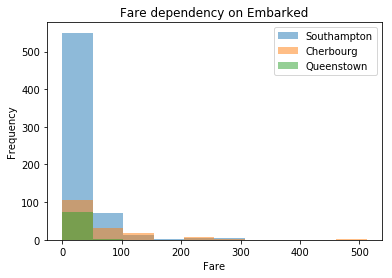

In [49]:
temp = pd.DataFrame({'Southampton': data[data['Embarked'] == 'S']['Fare'], 'Cherbourg': data[data['Embarked'] == 'C']['Fare'], 'Queenstown': data[data['Embarked'] == 'Q']['Fare']}, columns=['Southampton', 'Cherbourg', 'Queenstown'])
plt.figure()
temp.plot.hist(alpha=0.5)
plt.title('Fare dependency on Embarked')
plt.xlabel('Fare')

### 16

Все ли признаки несут в себе полезную информацию? Почему? Избавьтесь от ненужных столбцов.

In [35]:
del data['Name']
del data['Ticket']

Прим.: Поле PassengerId не несёт полезной информации, но используется позже для идентификации пассажиров (в задании 22) и не может быть удалено. Поля Name и Ticket нельзя анализировать с помощью алгоритмов машинного обучения, они удаляются.

### 17

Есть ли в данных пропуски? Если да, то в каких столбцах? Сколько пропусков в каждом из них?

In [36]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 18

Подумайте, как стоит заполнить пропуски в каждом столбце в зависимости от его типа, и сделайте это. Проверьте, что пропусков нигде не осталось.

In [37]:
data['Age'].fillna(data['Age'].mean().round(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)
data['Cabin'].fillna('0', inplace=True)
data.isnull().sum()

AttributeError: 'float' object has no attribute 'round'

### 19

Посчитайте, насколько сильно коррелируют друг с другом цена за билет и возраст пассажиров. Также проверьте наличие этой зависимости визуально (в этом вам поможет построение [диаграммы рассеяния](https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D0%B0%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0_%D1%80%D0%B0%D1%81%D1%81%D0%B5%D1%8F%D0%BD%D0%B8%D1%8F)).

In [ ]:
data['Fare'].corr(data['Age'])

In [ ]:
plt.scatter(data['Fare'], data['Age'], s=0.5, c='#b98d30')
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare correlation with Age')
plt.show()

### 20

Правда ли, что чаще выживали пассажиры с более дорогими билетами? А есть ли зависимость выживаемости от класса?

In [ ]:
plt.scatter(data['Fare'], data['Survived'], s=0.7, c='#b98d30')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Survived correlation with Fare')
plt.show()

In [ ]:
data['Survived'].corr(data['Fare'])

In [ ]:
data['Survived'].hist(by=data['Pclass'])
plt.suptitle("Survival dependency on passenger social class")

In [ ]:
data['Survived'].corr(data['Pclass'])

### 21

Создание новых признаков (feature engineering) является одним из основных средств улучшения качества работы алгоритмов машинного обучения на этапе обработки данных. Добавьте в таблицу столбец, который будет показывать, сколько родных плыло вместе с пассажиром на корабле, включая его самого. Затем придумайте свой признак, который может быть полезен для алгоритма (несет в себе какую-то информацию), и добавьте его в таблицу.

In [ ]:
data["Nfamily"] = data["Parch"] + data["SibSp"] + 1
data.head()

In [ ]:
data["FareRange"] = "Free"
data.loc[(data["Fare"] >= (data["Fare"].max()/3)*2), "FareRange"] = "Expensive"
data.loc[((data["Fare"] < (data["Fare"].max()/3)*2) & (data["Fare"] >= (data["Fare"].max()/3))), "FareRange"] = "Medium"
data.loc[((data["Fare"] < (data["Fare"].max()/3)) & (data["Fare"] >0)), "FareRange"] = "Cheap"
data.head()

### 22

Придумайте какое-нибудь интересное задание на анализ предлагаемых данных и решите его. Например, какая фамилия была самой популярной на корабле?

Верно ли, что семьи из 2-4 человек имели больший шанс спастись, чем одиночки и люди с большими семьями?

In [ ]:
data.groupby(['Survived','Nfamily'])['PassengerId'].size().unstack().plot(kind='bar',stacked=True)
plt.legend(['1 person','2 people','3 people','4 people','5 people','6 people','7 people','8 people','11 people']);
plt.show()

Из диаграммы наглядно видно, что предположение верно.

### 23

Постройте гистограммы распределения вещественных признаков. Есть ли в них разница? Чем это может быть плохо с точки зрения машинного обучения? Отнормируйте вещественные признаки и посмотрите, как изменилась ситуация.

In [ ]:
data['Age'].hist()
plt.suptitle('Age')
plt.xlabel('Age')
plt.ylabel('Number of people')

In [ ]:
data["Age"]=(data["Age"] - data["Age"].mean())/data["Age"].std()
data["Age"].hist(color="red")
plt.suptitle("Age")
plt.xlabel("Age")
plt.ylabel("Number of people")

In [ ]:
data['SibSp'].hist()
plt.suptitle('Siblings and spouses')
plt.xlabel('Number of siblings and spouses')
plt.ylabel('Number of people')

In [ ]:
data["SibSp"]=(data["SibSp"] - data["SibSp"].mean())/data["SibSp"].std()
data["SibSp"].hist(color="red")
plt.suptitle('Siblings and spouses')
plt.xlabel('Number of siblings and spouses')
plt.ylabel('Number of people')

In [ ]:
data['Parch'].hist()
plt.suptitle('Parents and children')
plt.xlabel('Number of family members')
plt.ylabel('Number of people')

In [ ]:
data["Parch"]=(data["Parch"] - data["Parch"].mean())/data["Parch"].std()
data["Parch"].hist(color="red")
plt.suptitle('Parents and children')
plt.xlabel('Number of family members')
plt.ylabel('Number of people')

In [ ]:
data['Fare'].hist()
plt.suptitle('Fare')
plt.xlabel('Fare')
plt.ylabel('Number of people')

In [ ]:
data["Fare"]=(data["Fare"] - data["Fare"].mean())/data["Fare"].std()
data['Fare'].hist(color="red")
plt.suptitle('Fare')
plt.xlabel('Fare')
plt.ylabel('Number of people')

### 24

Есть ли в данных категориальные признаки, которые принимают значения строк, а не чисел? Если да, то для многих алгоритмов машинного обучения это может стать серьезным препятствием, поэтому закодируйте категориальные признаки так, чтобы к данным можно было применить любые алгоритмы машинного обучения.

In [ ]:
data.loc[data['Sex'] == 'male', 'Sex'] = 1
data.loc[data['Sex'] == 'female', 'Sex'] = 0
data.loc[data['Embarked'] == 'S', 'Embarked'] = 1
data.loc[data['Embarked'] == 'C', 'Embarked'] = 2
data.loc[data['Embarked'] == 'Q', 'Embarked'] = 3
data.loc[data['Cabin'] == '0', 'Cabin'] = 0
data.loc[data['Cabin'] != '0', 'Cabin'] = 1